In [22]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import tifffile

import rasterio
from rasterio.windows import Window

<AxesSubplot:>

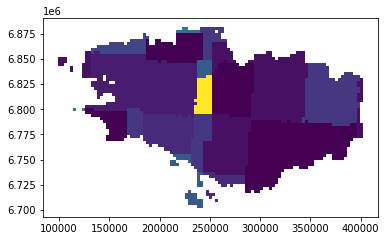

In [13]:
# LOAD DATA AND CREATE GDF
df = pd.read_pickle("/home/simon/CDE_UBS/thesis/data_collection/sen2/closest_dates.pkl")
gdf = gpd.GeoDataFrame(df, geometry=df.geom)
gdf = gdf.set_crs(epsg=2154)
gdf.plot(column="min")

# Try reading only part of image

In [67]:
im_path = '/home/simon/CDE_UBS/thesis/data_collection/small_sen2.tif'

In [72]:
def load_spot6_window(path,x,y,size):
    import rasterio
    with rasterio.open(path) as src:
        b1 = src.read(1, window=Window(x, y, size, size))
        b2 = src.read(2, window=Window(x, y, size, size))
        b3 = src.read(3, window=Window(x, y, size, size))
        im = np.dstack((b1,b2,b3))
        del b1,b2,b3


    return(im)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


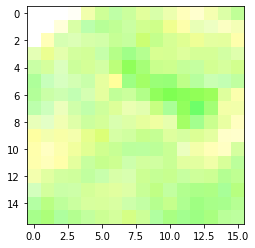

In [81]:
part = load_spot6_window(im_path,x=1,y=1,size=16)
plt.imshow(part)